In [ ]:
from google.colab import drive
drive.mount('/content/drive')
veri_yol='/content/drive/MyDrive/Advertising.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


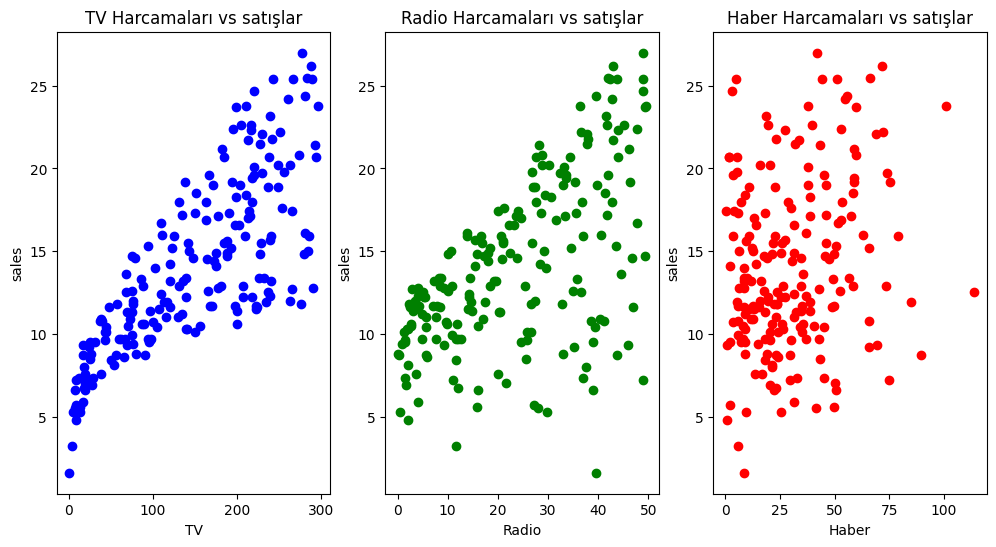

In [ ]:
veri = pd.read_csv(veri_yol)
plt.figure(figsize= (12,6))

plt.subplot(1,3,1)
plt.scatter(veri.TV,veri.Sales,color='blue')
plt.title('TV Harcamaları vs satışlar')
plt.xlabel('TV')
plt.ylabel('sales')

plt.subplot(1,3,2)
plt.scatter(veri["Radio"],veri["Sales"],color='green')
plt.title('Radio Harcamaları vs satışlar')
plt.xlabel('Radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(veri["Newspaper"],veri["Sales"],color='red')
plt.title('Haber Harcamaları vs satışlar')
plt.xlabel('Haber')
plt.ylabel('sales')
plt.show()

Model OLuşturma

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = veri[['TV']]
y = veri['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)





MSE: 8.970991242413614


# Katsayılar ve kesişim noktaları

In [ ]:
print('Katsayı :', reg.coef_) # Y = 7.11 + 0.0465X
print('Kesişim Noktası :',reg.intercept_)


Katsayı : [0.0464078]
Kesişim Noktası : 7.239459830751138


Model grafiği


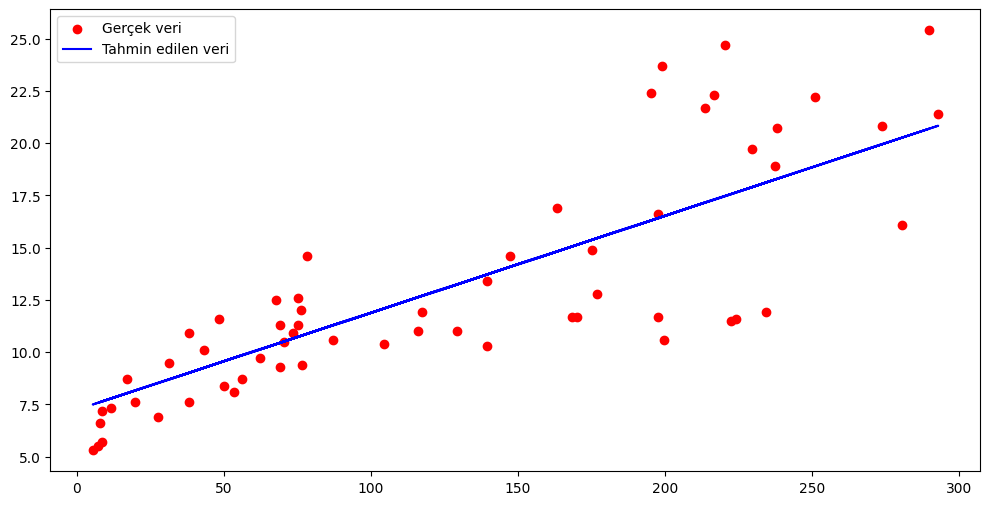

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='red', label  = 'Gerçek veri')
plt.plot(X_test,y_pred,color='blue',label = 'Tahmin edilen veri')
plt.legend()
plt.show()



#Çoklu Doğrusal Regrasyon

In [ ]:
X = veri[['TV','Radio','Newspaper']]
y = veri[['Sales']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)



MSE: 3.79679723671522


In [ ]:
print('kat sayı hata', reg.coef_)
print('kesişim noktası',reg.intercept_)

kat sayı hata [[0.04405928 0.1992875  0.00688245]]
kesişim noktası [2.70894909]


# Ev Fiyatları

In [ ]:
from sklearn.datasets import fetch_california_housing

house = fetch_california_housing()
data = pd.DataFrame(house.data,columns=house.feature_names)
data['PRICE'] = house.target
print(data.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
5    -122.25  2.697  
6    -122

In [ ]:
X = data.drop('PRICE',axis=1)
y = data['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)

MSE: 0.5305677824766758


In [ ]:
print('Kat sayılar', reg.coef_)
print('Kesişim Noktaları', reg.intercept_)


Kat sayılar [ 4.45822565e-01  9.68186799e-03 -1.22095112e-01  7.78599557e-01
 -7.75740400e-07 -3.37002667e-03 -4.18536747e-01 -4.33687976e-01]
Kesişim Noktaları -37.05624133152533


#PCR


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ölcek = StandardScaler()
x_ölçek = ölcek.fit_transform(X)
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_ölçek)

X_train,X_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.30,random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)





MSE: 0.5491315830567497


In [ ]:
print('Katsayılar', reg.coef_)
print('Kesişim Noktaları', reg.intercept_)


Katsayılar [0.04395702 0.15396419 0.0339033  0.72944325 0.01125749 0.33044784
 1.28771934]
Kesişim Noktaları 2.0684345529310524


PLS


In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)
pls.fit(X_train,y_train)
y_pred = pls.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)

MSE: 0.5491315830567495


#Ridge Regrasyon

In [ ]:
from sklearn.linear_model import Ridge
redge = Ridge(alpha= 0.5)
redge.fit(X_train,y_train)
y_pred = redge.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('MSE:',mse)


MSE: 3.796691873092173
